In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib


In [46]:
df = pd.read_csv('sbikedata.csv')

temperature

In [77]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df['temperature'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


In [79]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df['temperature'].isna().value_counts()

temperature
False    5827
Name: count, dtype: int64

In [80]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

# 가설수립


* 귀무가설 1: 온도와 따릉이 대여량간에는 관계가 없다.
* 대립가설 1: 온도와 따릉이 대여량간에는 관계가 있다.


## 이변량 분석 

### 온도 데이터 분석

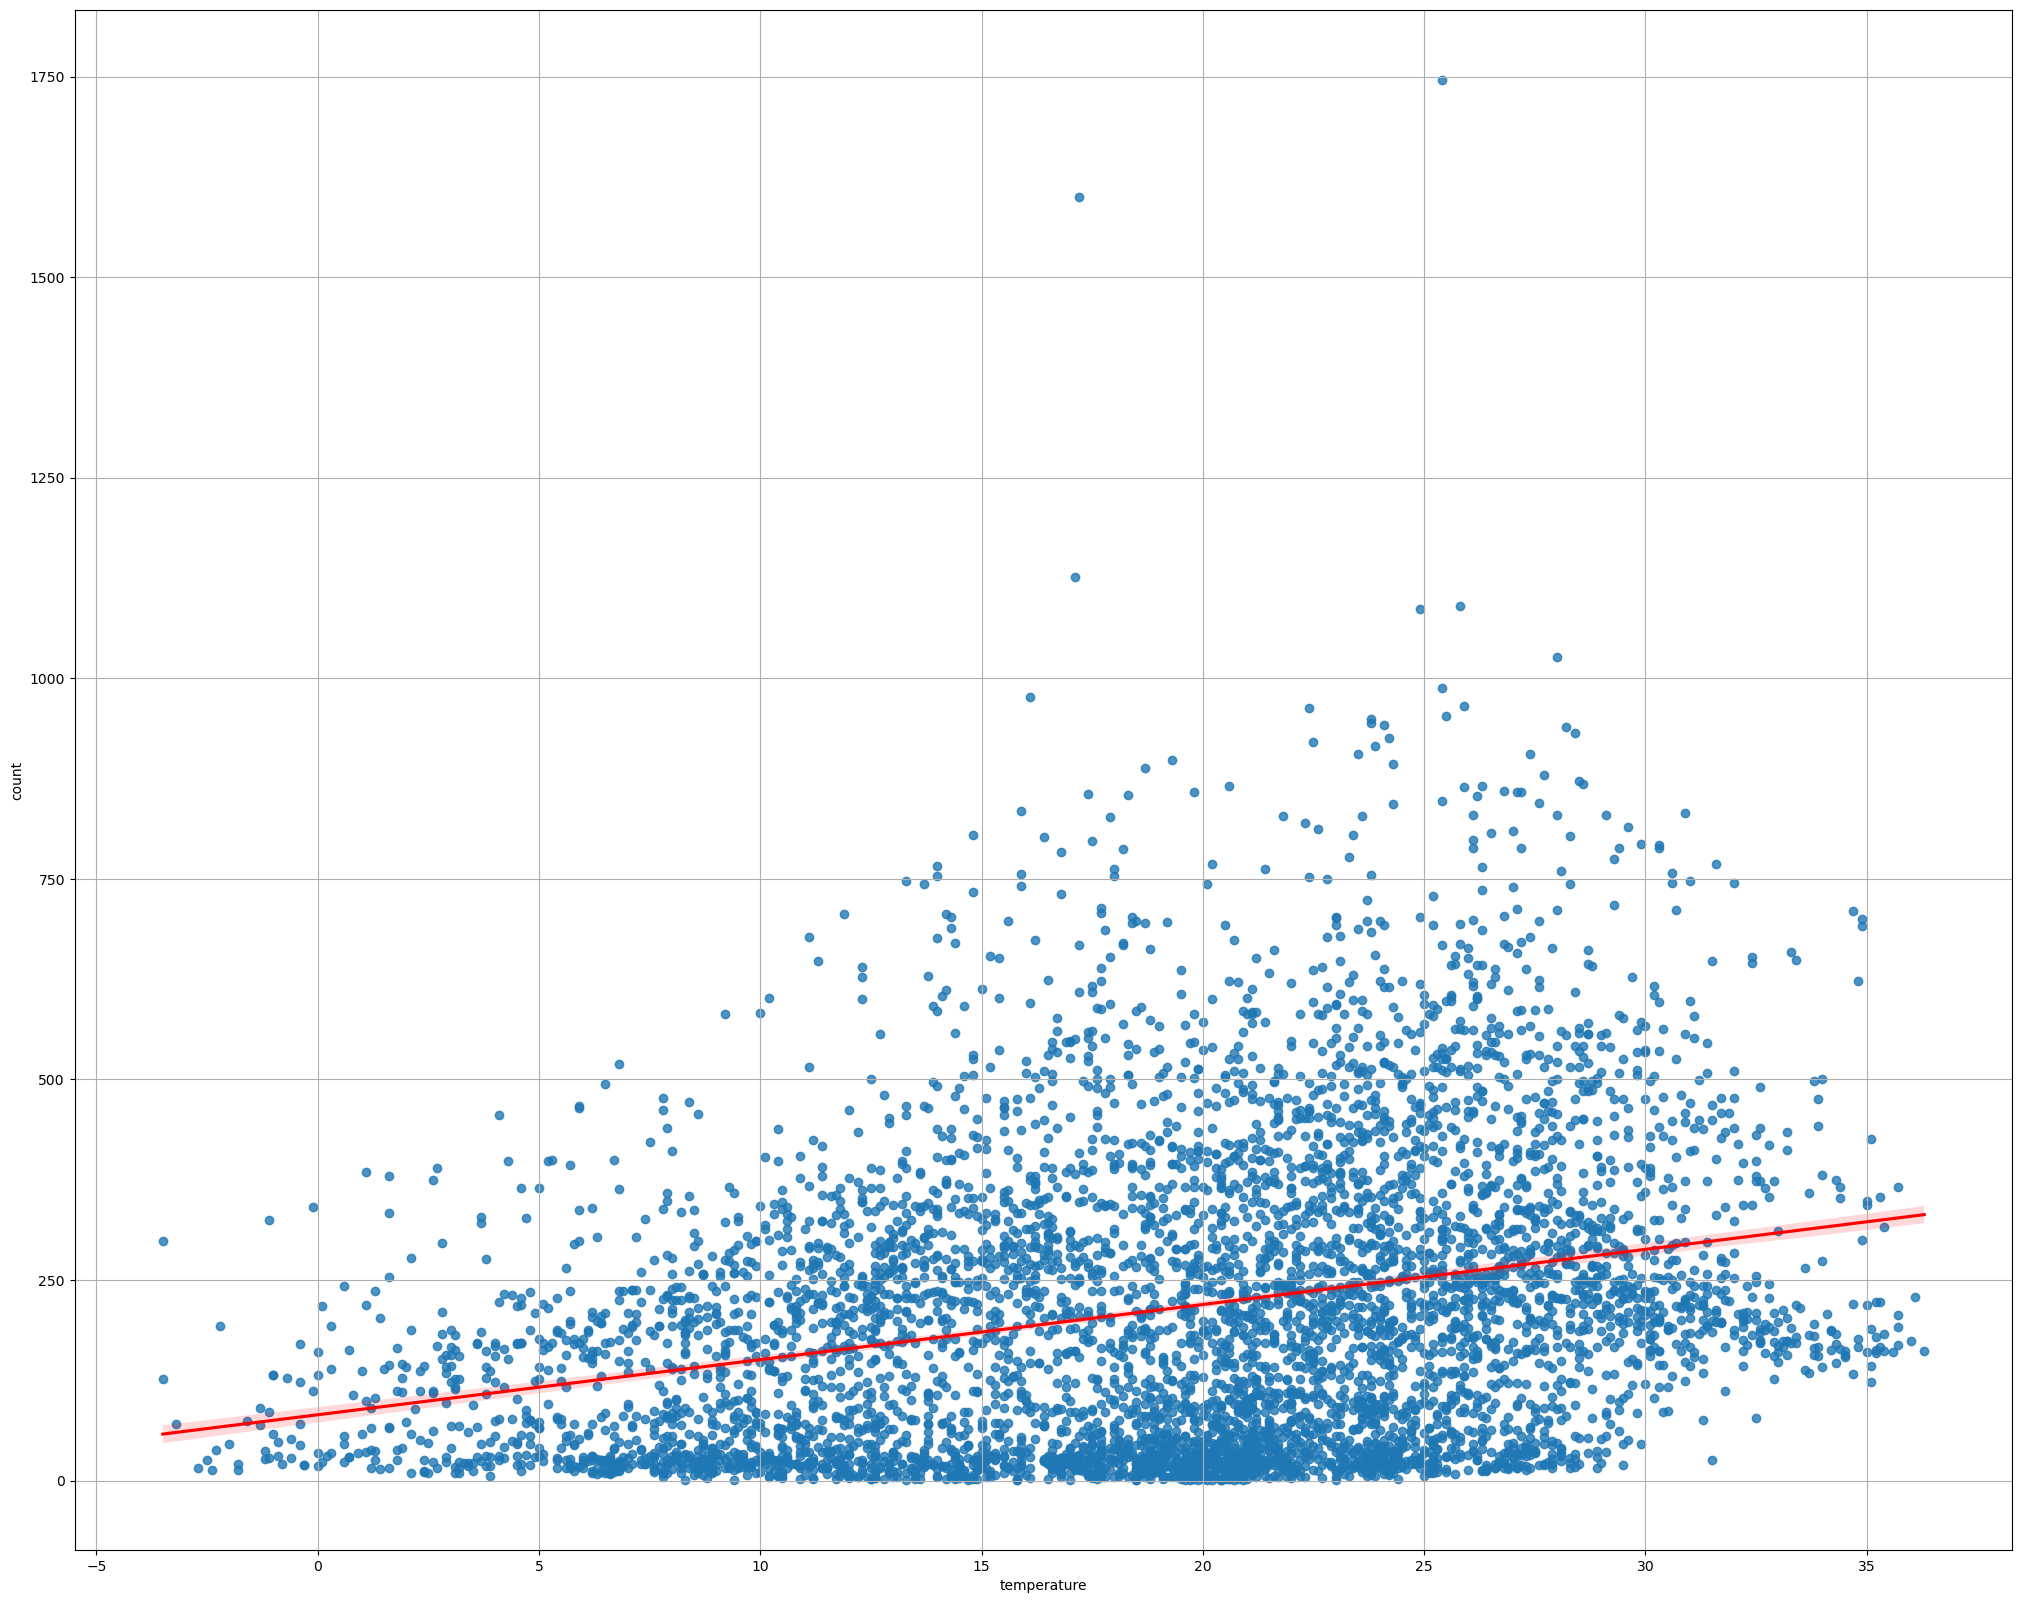

In [77]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

plt.figure(figsize = (25, 20))
sns.regplot(x = 'temperature', y = 'count', data = df, line_kws={'color': 'red'})
plt.grid()
plt.show()

In [56]:
result = spst.pearsonr(df['temperature'], df['count'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2771692363089791, p-value : 2.940516555113978e-103


# 가설 검증

* 상관계수가 약 0.27이고 p-value가 0.05보다 작으므로 온도별 따릉이 대여 수는 조금 관계가 있다.

## 추가분석

* 온도와 습도에 따라 따릉이 대여량에는 차이가 있다.

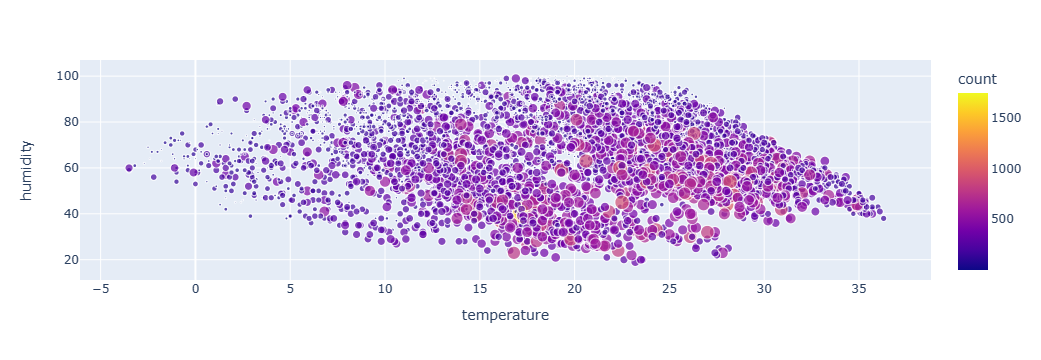

In [80]:
import plotly.express as px


fig = px.scatter(df, x = 'temperature', y = 'humidity', color = 'count', size = 'count',
                text = 'count' # 라벨을 위한 열 이름을 지정
                )

fig.update_traces(textposition = 'top center') # 텍스트 위치 조정

fig.show()